## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
bike_share = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike sharing dataframe

In [5]:
bike_share.shape

(730, 16)

In [6]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike_share['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
# season (1:spring, 2:summer, 3:fall, 4:winter)

def ses(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
bike_share['season'] = bike_share['season'].apply(ses)

In [10]:
bike_share['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [11]:
# months categorical convertion with dictionary

def month(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'        
    })

bike_share[['mnth']] = bike_share[['mnth']].apply(month)

In [12]:
bike_share['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [13]:
# year categorical convertion (1: 2019, 0: 2018)

def year(x):
    if x==1:
        return '2019'
    else:
        return '2018'

bike_share['yr'] = bike_share['yr'].apply(year)

In [14]:
bike_share['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
# holiday categorical convertion (1: yes, 0: no)

def holiday(x):
    if x==1:
        return 'yes'
    else:
        return 'no'

bike_share['holiday'] = bike_share['holiday'].apply(holiday)

In [16]:
bike_share['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [17]:
# day of week to be changed to understandable object format with dictionary

def day(x):
    return x.map({
        0:'Sun',
        1:'Mon',
        2:'Tue',
        3:'Wed',
        4:'Thur',
        5:'Fri',
        6:'Sat',       
    })

bike_share[['weekday']] = bike_share[['weekday']].apply(day)

In [18]:
bike_share['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [19]:
# count of total working day updated as 1 and weekends and holidays as 0
# so converting it to categorical if working day 'yes' and for weekends and holidays as 'no'

def working(x):
    if x==1:
        return 'yes'
    else:
        return 'no'

bike_share['workingday'] = bike_share['workingday'].apply(working)

In [20]:
bike_share['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
# changing weather to understandable object format

def weather(x):
    if x==1:
        return 'Clear'
    elif x==2:
        return 'Mist'
    else:
        return 'Light Rain'
    
bike_share['weathersit'] = bike_share['weathersit'].apply(weather)

In [22]:
# changing the date time format

bike_share['dteday'] = bike_share['dteday'].astype('datetime64')

In [23]:
# now let's take a look at the final dataset with approriate data types

bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [24]:
# make a seperate dataframe for categorical

bike_categorical = bike_share.select_dtypes(exclude=['float64','int64','datetime64'])

In [25]:
bike_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [26]:
bike_categorical.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,2018,Jan,no,Mon,yes,Mist
1,spring,2018,Jan,no,Tue,yes,Mist
2,spring,2018,Jan,no,Wed,yes,Clear
3,spring,2018,Jan,no,Thur,yes,Clear
4,spring,2018,Jan,no,Fri,yes,Clear


## Step 2: Data Visualization

Now let's visualize `Categorical` columns

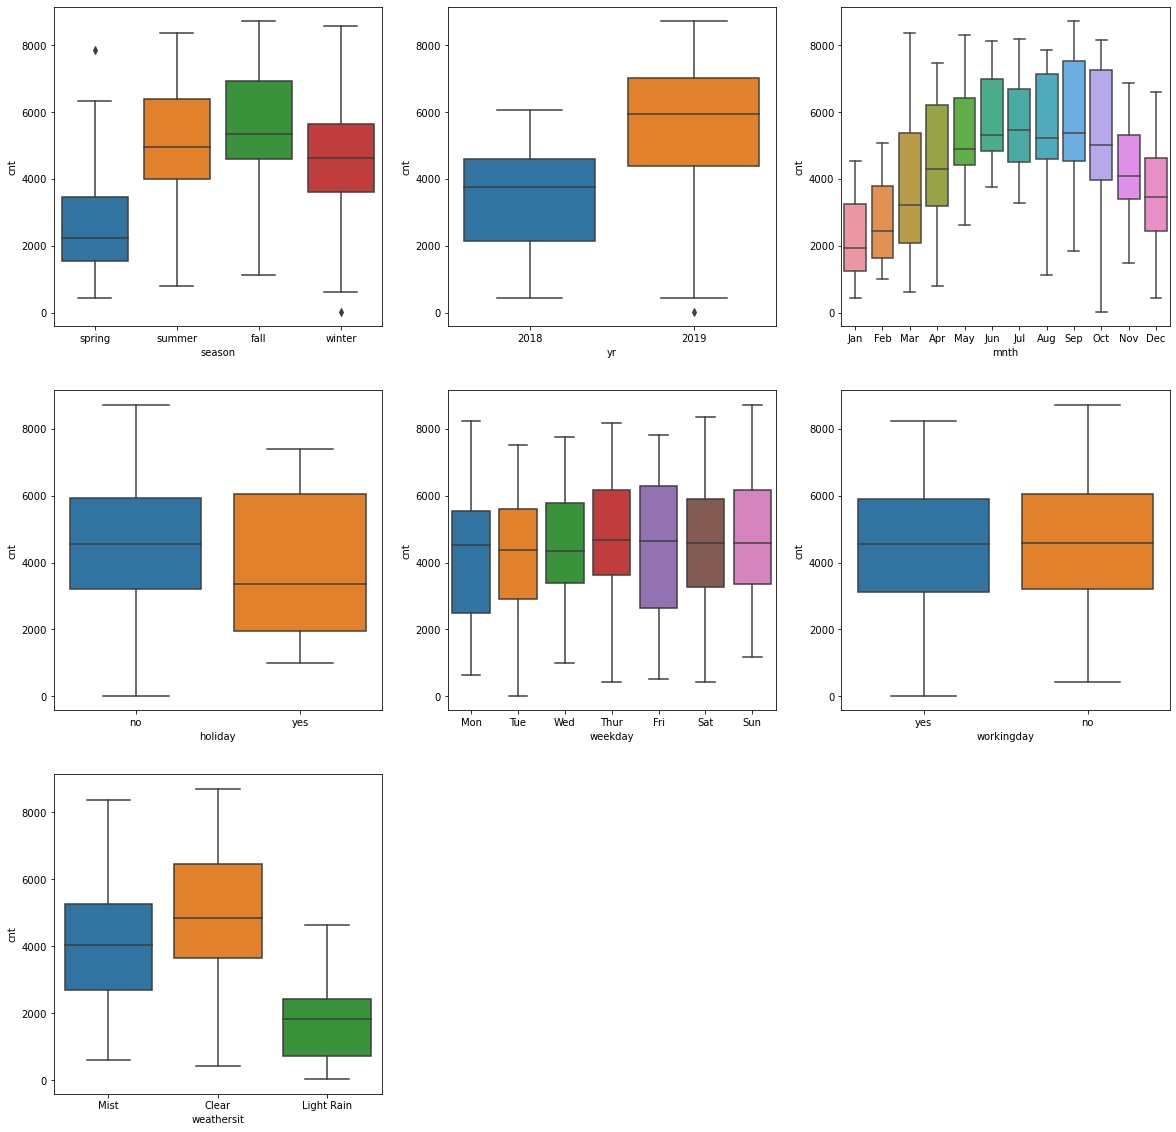

In [27]:
# Box plot of the categorical variables with the 'cnt' count of total users

plt.figure(figsize=(20,20))
plt.subplot(3,3,1) # plt.subplot(331)
sns.boxplot(x='season', y='cnt', data=bike_share)
plt.subplot(3,3,2) # plt.subplot(332)
sns.boxplot(x='yr', y='cnt', data=bike_share)
plt.subplot(3,3,3) # plt.subplot(333)
sns.boxplot(x='mnth', y='cnt', data=bike_share)
plt.subplot(3,3,4) # plt.subplot(334)
sns.boxplot(x='holiday', y='cnt', data=bike_share)
plt.subplot(3,3,5) # plt.subplot(335)
sns.boxplot(x='weekday', y='cnt', data=bike_share)
plt.subplot(3,3,6) # plt.subplot(336)
sns.boxplot(x='workingday', y='cnt', data=bike_share)
plt.subplot(3,3,7) # plt.subplot(337)
sns.boxplot(x='weathersit', y='cnt', data=bike_share)
plt.show();

#### Analysis of categorical variables with respect to total users `cnt`

- The users seem to be higher during `fall` and `summer` season in using bike sharing, which is the academic calendar of the `US`
- Users have doubled up during `2019` when compared with `2018` count
- The users count have a gradual increase over the months whereas after fall there is a slight decrement in count during winter season for months `November` and `December`
- There is a slight decrement in total user count during holidays, however until 75th percentile the users count on both holiday and non-holiday are almost same
- The users count is slightly higher during the start of the week and ranges in-between 6000 to 8000 during mid of the week
- Either it be workingday or weekend or holiday the total users are almost similar in count
- During clear sky and slightly cloudy and when also when its misty and cloudy the user's count is higher, however the user's are actively higher during the clear weather time

In [28]:
# make a seperate dataframe for numerical

bike_numerical = bike_share.select_dtypes(include=['float64','int64'])

In [29]:
x = bike_numerical.columns

In [30]:
bike_numerical.head()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,9.305237,11.46350,43.6957,12.522300,82,1518,1600


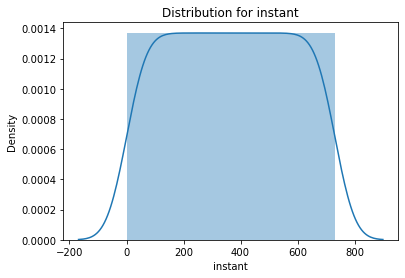

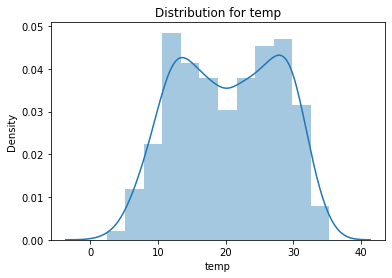

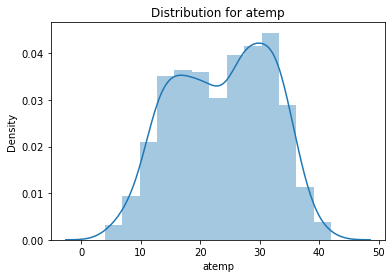

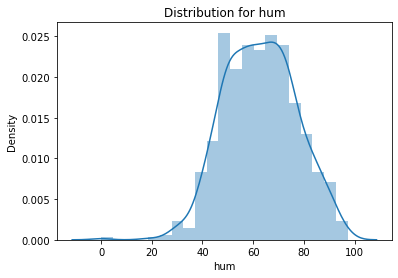

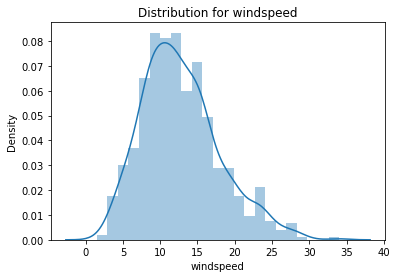

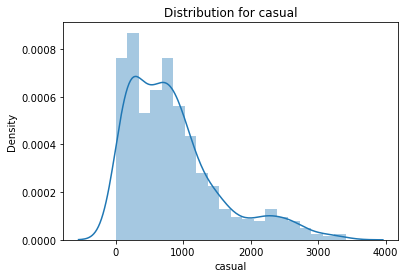

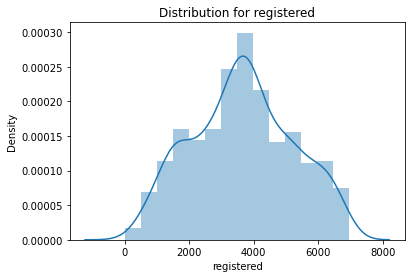

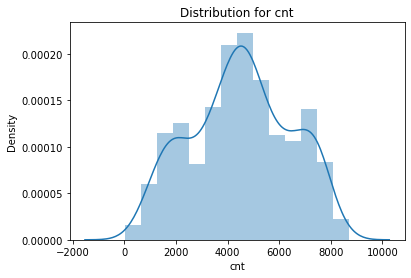

In [31]:
# Univariate analysis of all the above numerical columns

for col in x:
    sns.distplot(bike_share[col])
    plt.title("Distribution for "+col)
    plt.show();
    print("=================================")

The columns `temp` and `atemp` are bi-modal since there is a dip in distribution
, columns `hum`, `windspeed`, `registered`, `cnt` are uniformly distributed so we can confirm that these factors have high dependency with the bike hiring
and finally column `casual` is non-uniform distribution, which means that the casual users are not a reliable source for model prediction

In [32]:
# the column instant is of no use in further imputation so let's drop the same

x = x[1:]

In [33]:
x

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [34]:
bike_share[x].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600


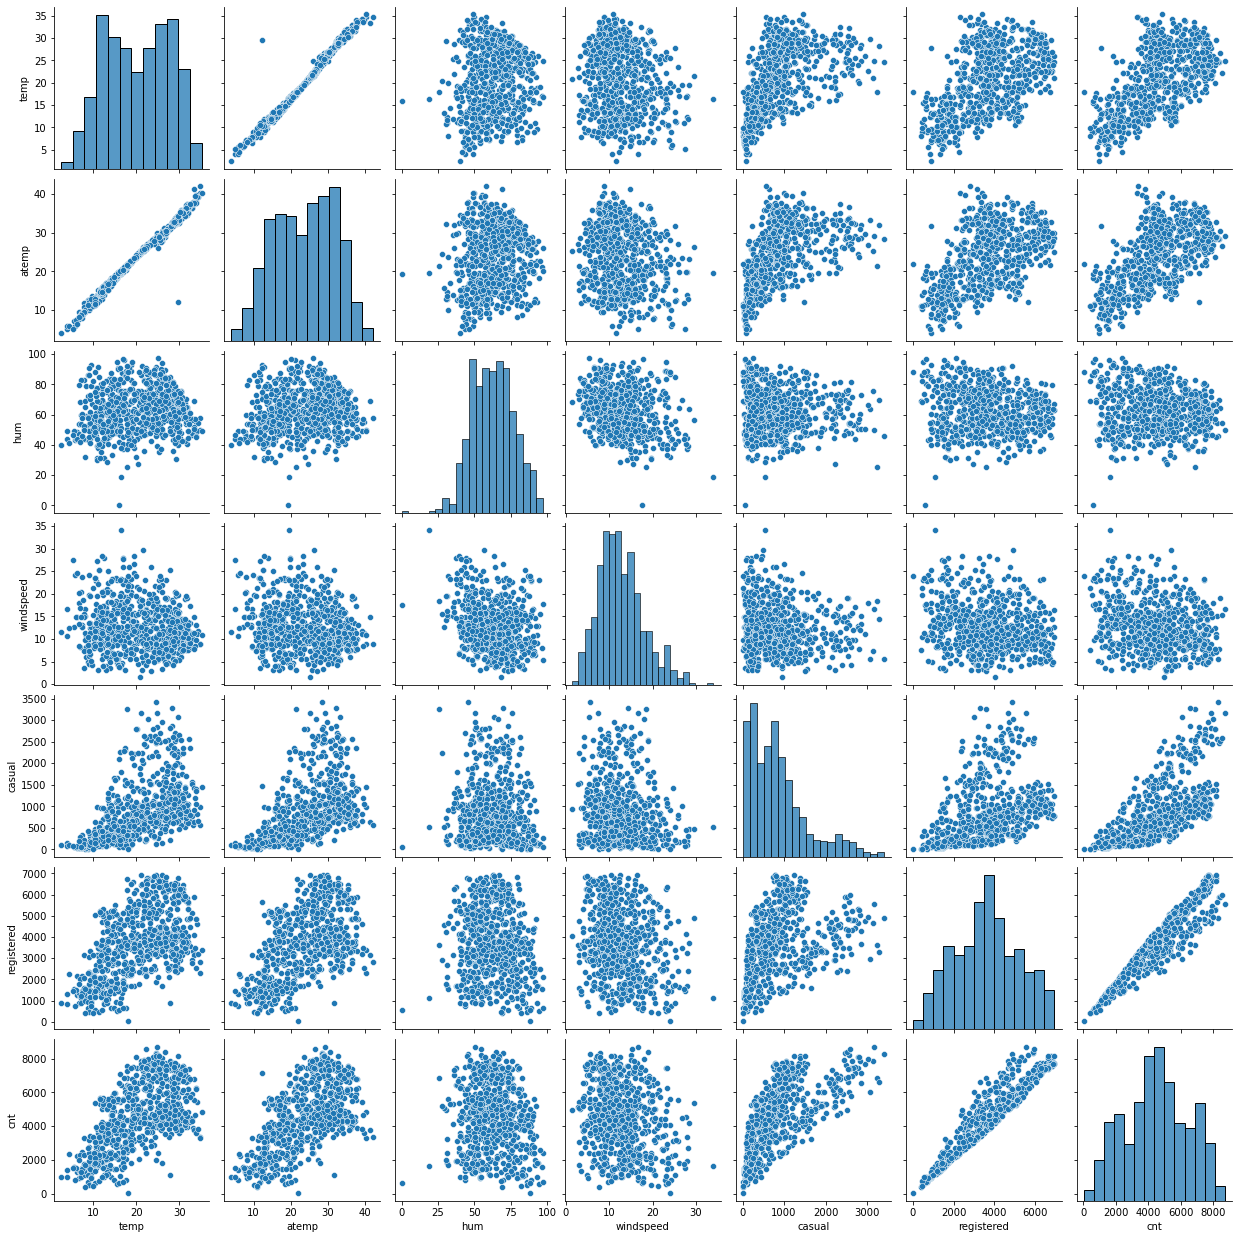

In [35]:
# Analyzing Numerical variables using pairplot

sns.pairplot(bike_share[x])
plt.show()

The columns `temp` and `atemp` are highly correlated and for further imputation we can just use just `temp` not both, also columns `casual` and `registered` with `cnt` is collinear so its better to drop these columns in further imputation

In [36]:
bike_share[x].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


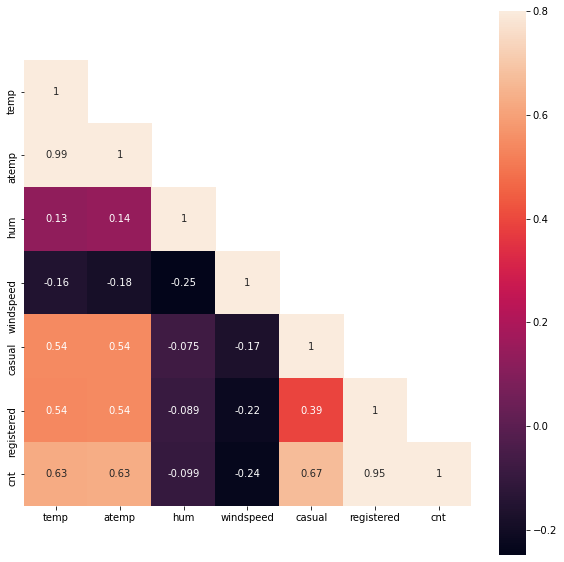

In [37]:
# heatmap with masking to have a clear view correlation

mask = np.array(bike_share[x].corr())
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(bike_share[x].corr(), mask=mask, vmax=0.8, square=True, annot=True);

The columns `atemp`, `casual` and `registered` has close correlation so we need to action (drop) on these columns before model building in order to get a proper alignment

In [38]:
# drop atemp column 

bike_share.drop('atemp', axis=1, inplace=True)

In [39]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,no,Mon,yes,Mist,14.110847,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,no,Tue,yes,Mist,14.902598,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,no,Wed,yes,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,no,Thur,yes,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,no,Fri,yes,Clear,9.305237,43.6957,12.522300,82,1518,1600


## Step 3: Data Preparation

In [40]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 85.7+ 

In [41]:
bike_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [42]:
# convert categorical variables to dummies

bike_dummies = pd.get_dummies(bike_categorical,drop_first=True)
bike_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,workingday_yes,weathersit_Light Rain,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
bike_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   season_spring          730 non-null    uint8
 1   season_summer          730 non-null    uint8
 2   season_winter          730 non-null    uint8
 3   yr_2019                730 non-null    uint8
 4   mnth_Aug               730 non-null    uint8
 5   mnth_Dec               730 non-null    uint8
 6   mnth_Feb               730 non-null    uint8
 7   mnth_Jan               730 non-null    uint8
 8   mnth_Jul               730 non-null    uint8
 9   mnth_Jun               730 non-null    uint8
 10  mnth_Mar               730 non-null    uint8
 11  mnth_May               730 non-null    uint8
 12  mnth_Nov               730 non-null    uint8
 13  mnth_Oct               730 non-null    uint8
 14  mnth_Sep               730 non-null    uint8
 15  holiday_yes            730 non-null    u

In [44]:
# drop categorical columns from the main dataframe since we have created dummies out of it already

list(bike_categorical.columns)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [45]:
bike_share = bike_share.drop(list(bike_categorical.columns), axis=1)

In [46]:
bike_share.columns

Index(['instant', 'dteday', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [47]:
# concatenation of both bike_share dataframe with numerical and bike_dummies dataframe

bike_share = pd.concat([bike_share,bike_dummies], axis=1)

In [48]:
bike_share.head()

,instant,dteday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,workingday_yes,weathersit_Light Rain,weathersit_Mist
0,1,2018-01-01,14.110847,80.5833,10.749882,331,654,985,1,0,...,0,1,0,0,0,0,0,1,0,1
1,2,2018-02-01,14.902598,69.6087,16.652113,131,670,801,1,0,...,0,0,0,0,0,1,0,1,0,1
2,3,2018-03-01,8.050924,43.7273,16.636703,120,1229,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,4,2018-04-01,8.200000,59.0435,10.739832,108,1454,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,5,2018-05-01,9.305237,43.6957,12.522300,82,1518,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# drop the columns 'instant' and 'dteday' from the above main dataframe as it doesn't contribute for our modelling

bike_share = bike_share.drop(['instant','dteday'], axis=1)

In [50]:
bike_share.head()

,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,yr_2019,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,workingday_yes,weathersit_Light Rain,weathersit_Mist
0,14.110847,80.5833,10.749882,331,654,985,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,131,670,801,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,120,1229,1349,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,108,1454,1562,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,82,1518,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
# columns 'casual' and 'registered' are dependent variables of column 'cnt' so they can be dropped
# 'cnt' is the target variable (independent) 

bike_share = bike_share.drop(['casual','registered'], axis=1)

In [52]:
bike_share.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,workingday_yes,weathersit_Light Rain,weathersit_Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
list(bike_share.describe().columns)

['temp',
 'hum',
 'windspeed',
 'cnt',
 'season_spring',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'holiday_yes',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thur',
 'weekday_Tue',
 'weekday_Wed',
 'workingday_yes',
 'weathersit_Light Rain',
 'weathersit_Mist']

In [55]:
# scaling of the numerical columns 

var = ['temp','hum','windspeed']
bike_share[var] = scaler.fit_transform(bike_share[var])

In [56]:
bike_share.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,workingday_yes,weathersit_Light Rain,weathersit_Mist
0,-0.827613,1.252343,-0.387833,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,-0.722069,0.480996,0.748899,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,-1.635432,-1.338073,0.745931,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,-1.615560,-0.261577,-0.389769,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,-1.468226,-1.340294,-0.046477,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 5: Model Building

In [57]:
# take the model dimentions X and y from the dataframe

X = bike_share.drop('cnt', axis=1)
y = bike_share['cnt']

In [58]:
X.shape

(730, 28)

In [59]:
y.shape

(730,)

In [60]:
# train and test split for model building with train at 80% and test and 20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
X_train.shape

(584, 28)

In [62]:
X_test.shape

(146, 28)

In [63]:
y_train.shape

(584,)

In [64]:
y_test.shape

(146,)

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
regressor.coef_

array([  870.84771532,  -253.61860402,  -239.73835723,  -810.95174699,
          54.0187963 ,   649.14721019,  1930.12652509,  -146.06068639,
        -459.39702039,  -332.66649109,  -458.99852022,  -613.16936672,
        -127.45795636,    87.30298066,   211.23185129,  -548.24932305,
          59.23763089,   484.59604018,  -968.22538078,  -198.75351395,
        -520.50413403,  -438.49262673,    46.6807705 ,  -190.91788894,
         -83.75133886,  -632.66948105, -1772.94094332,  -425.54248107])

In [67]:
coeff_bike = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

In [68]:
coeff_bike

,Coefficient
temp,870.847715
hum,-253.618604
windspeed,-239.738357
season_spring,-810.951747
season_summer,54.018796
season_winter,649.147210
yr_2019,1930.126525
mnth_Aug,-146.060686
mnth_Dec,-459.397020
mnth_Feb,-332.666491


In [69]:
print(regressor.intercept_)

4567.945982073517


In [70]:
# Make predictions of the test set model

y_pred = regressor.predict(X_test)

In [71]:
# Compare the two actual and predicted values of test set model

compare = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
compare

,Actual,Predicted
196,5923,4053.640777
187,4592,4699.929247
14,1248,1123.210261
31,1360,1033.427099
390,4075,3658.722219
...,...,...
118,4595,4402.779055
566,4459,3656.224953
688,5634,5110.255082
266,5423,4901.613353


In [72]:
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 592.5103081212914
Mean Squared Error: 573752.4685104525
Root Mean Squared Error: 757.4644998351095


In [73]:
# R-squared score

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8704045149316654

#### R-squared score for test and predicted is `87%` and the model seems to be fine

In [74]:
# Adjusted rsquare for training set

yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8373120128681547 0.8291043306344761


In [75]:
# Adjusted rsquare for test set

yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8704045149316654 0.8393902108127477


## Step 6: RFE (Recursive Feature Elimination)

In [76]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# fit the model based on ranking

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [78]:
# list the columns based on ranking order of importance

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 4),
 ('mnth_Mar', False, 6),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 9),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 5),
 ('workingday_yes', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [79]:
# check for the top 20 support columns based on ranking 

X_train.columns[rfe.support_]

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'holiday_yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'workingday_yes', 'weathersit_Light Rain', 'weathersit_Mist'],
      dtype='object')

In [80]:
len(X_train.columns[rfe.support_])

20

In [81]:
# Create a dataframe of X_train with RFE rank supported columns

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,holiday_yes,weekday_Mon,weekday_Sat,weekday_Sun,workingday_yes,weathersit_Light Rain,weathersit_Mist
239,1.155777,-0.463083,1.473059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
97,-0.873163,1.466128,0.470861,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
503,0.570645,-1.204693,-1.374597,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
642,0.652627,-0.001067,-1.085875,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
498,0.424896,1.138130,0.286337,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1


### Building model with statsmodel and calculating VIF

In [82]:
# build the model using the statsmodel and also check variance_inflation_factor(VIF)

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [83]:
# imputing the vaules of X_train_rfe dataframe with y_train of target variable 'cnt' with model building to check the trained model

X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     142.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.84e-205
Time:                        10:51:25   Log-Likelihood:                -4707.6
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     563   BIC:                             9549.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4463.82

`weekday_Mon`, `workingday_yes`, `weekday_Sat` and `weekday_Sun` are insignificant in presence of other variables as p-values of these variables are higher than 0.05; so it can be dropped

In [84]:
X_train_new = X_train_rfe.drop(["weekday_Mon","workingday_yes","weekday_Sat","weekday_Sun"], axis = 1)

In [85]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [86]:
# imputing the training model X_train_lm after dropping the 'weekday_Mon','workingday_Yes','weekday_Sat','weekday_Sun' which has p-value > 0.05

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the final linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.93e-207
Time:                        10:51:54   Log-Likelihood:                -4714.6
No. Observations:                 584   AIC:                             9463.
Df Residuals:                     567   BIC:                             9538.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3890.99

In [87]:
X_train_new.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'holiday_yes', 'weathersit_Light Rain', 'weathersit_Mist'],
      dtype='object')

In [87]:
# checking the final VIF after training model building

checkVIF(X_train_new)

,Features,VIF
3,season_spring,4.02
0,temp,3.00
4,season_winter,2.56
8,mnth_Jan,2.34
7,mnth_Feb,2.05
15,weathersit_Mist,2.01
1,hum,1.93
5,yr_2019,1.91
11,mnth_Nov,1.87
6,mnth_Dec,1.71


## Step 7: Residual Analysis of the train data set

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [88]:
y_train_cnt = lm.predict(X_train_lm)

In [89]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

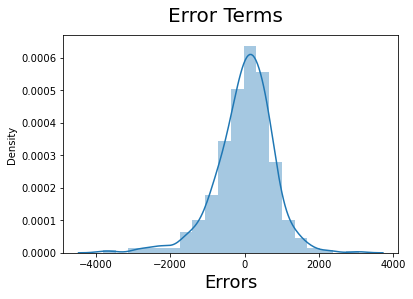

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions using final model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [91]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [92]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

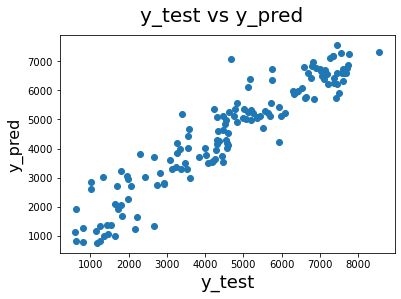

In [93]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

$ cnt = 815  \times  temp - 269  \times  hum - 242 \times windspeed - 778 \times seasonspring + 687 \times seasonwinter + 1949 \times yr2019 - 548 \times mnthDec - 425 \times mnthFeb - 572 \times mnthJan - 532 \times mnthJul + 314 \times mnthMay - 622 \times mnthNov + 537 \times mnthSep - 473 \times holidayyes - 1692 \times weathersitLight Rain - 385 \times weathersitMist $
